# Some Packages

Let's walk over a couple of packages that you might find useful.

Most packages are tracked by https://juliaobserver.com/. Packages are grouped into categories.

There is also https://pkg.julialang.org/docs/.

### [Parameters.jl](https://github.com/mauro3/Parameters.jl)

In [1]:
using Parameters

In [2]:
@with_kw struct MyParams
    x::Int = 4
    y::Float64
end

MyParams

In [3]:
MyParams()

ErrorException: Field 'y' has no default, supply it with keyword.

In [4]:
MyParams(y = 2)

MyParams
  x: Int64 4
  y: Float64 2.0


In [5]:
@with_kw struct MyParams2
    x::Int = 4;
    y::Float64 = 5.3
    z::Int = floor(x+y)
end

MyParams2

In [6]:
MyParams2()

MyParams2
  x: Int64 4
  y: Float64 5.3
  z: Int64 9


In [7]:
@with_kw struct MyParams3
    x::Int = 4; @assert x != 2
    y::Float64 = 5.3
    @assert x + y >= 9
end

MyParams3

In [8]:
MyParams3(y = 3)

AssertionError: AssertionError: x + y >= 9

In [9]:
MyParams3(x = 2)

AssertionError: AssertionError: x != 2

In [10]:
@with_kw mutable struct MyParams4 @deftype Int
    x = 4;
    y::Float64 = 5.3
    z = floor(x+y)
    a = 1
    b = 2
end

MyParams4

### [ProgressMeter.jl](https://github.com/timholy/ProgressMeter.jl)

In [66]:
using ProgressMeter

In [ ]:
@showprogress .5 for i in 1:20
    sleep(rand())
end

### [StaticArrays.jl](https://github.com/JuliaArrays/StaticArrays.jl)

In [1]:
using StaticArrays

In [5]:
m = SMatrix{2,2}(1, 2, 3, 4)

2×2 SArray{Tuple{2,2},Int64,2,4}:
 1  3
 2  4

In [7]:
size(m)

(2, 2)

In [9]:
size(typeof(m))

(2, 2)

In [24]:
# compare to
M = Matrix(m)
size(typeof(M))

MethodError: MethodError: no method matching size(::Type{Array{Int64,2}})
Closest candidates are:
  size(!Matched::BitArray{1}) at bitarray.jl:70
  size(!Matched::BitArray{1}, !Matched::Any) at bitarray.jl:74
  size(!Matched::Core.Compiler.StmtRange) at show.jl:1561
  ...

In [31]:
m2 = @SMatrix [ 1  3 ;
                2  4 ]

2×2 SArray{Tuple{2,2},Int64,2,4}:
 1  3
 2  4

In [32]:
m3 = @SMatrix rand(4,4)

4×4 SArray{Tuple{4,4},Float64,2,16}:
 0.278213  0.455851  0.336642  0.154724
 0.534905  0.333391  0.588661  0.754726
 0.142001  0.879145  0.650837  0.343375
 0.371889  0.748404  0.112358  0.272267

In [34]:
a = @SArray randn(2, 2, 2)

2×2×2 SArray{Tuple{2,2,2},Float64,3,8}:
[:, :, 1] =
 -0.892293  1.80155
  0.872782  1.2959 

[:, :, 2] =
 0.0617252  0.751006
 0.813146   0.175316

** Static arrays are fast ... **

In [13]:
using BenchmarkTools, LinearAlgebra

In [26]:
println("Inversion")
@btime inv($m);
@btime inv($M);

Inversion
  11.520 ns (0 allocations: 0 bytes)
  665.815 ns (6 allocations: 1.50 KiB)


In [28]:
println("Matrix x vector")
v = rand(2)
@btime $m * $v;
@btime $M * $v;

Matrix x vector
  6.400 ns (0 allocations: 0 bytes)
  49.563 ns (1 allocation: 96 bytes)


*Benchmarks for 3×3 Float64 matrices:*

| Operation | Speedup |
| --- | --- |
| Matrix multiplication | 8.2x |
| Matrix multiplication (mutating)    | 3.1x |
| Matrix addition                     | 45x |
| Matrix addition (mutating)          | 5.1x |
| Matrix determinant                  | 170x |
| Matrix inverse                      | 125x |
| Matrix symmetric eigendecomposition | 82x |
| Matrix Cholesky decomposition       | 23.6x |

** ... as long as they are not too large ** because they put a lot of stress on the compiler!

In [48]:
# takes a long time to compile and is slower
N = 50
M = rand(N,N);
v = rand(N);
m = SMatrix{N,N}(M);

println("Inversion")
@btime inv($m);
@btime inv($M);

println("Matrix x vector")
@btime $m * $v;
@btime $M * $v;

Inversion
  288.854 μs (8 allocations: 65.00 KiB)
  281.173 μs (6 allocations: 45.36 KiB)
Matrix x vector
  1.195 μs (0 allocations: 0 bytes)
  497.409 ns (1 allocation: 544 bytes)


### LsqFit.jl

Least square fitting of data to a custom model.

In [60]:
using LsqFit

In [ ]:
model(x, p) = p[1]*exp.(-x.*p[2]) # f(x) = α*exp(-γ*x)

xdata = linspace(0, 10, 20)
ydata = model(xdata, [1.0 2.0]) + 0.01*randn(length(xdata))
p0 = [0.5, 0.5]

fit = curve_fit(model, xdata, ydata, p0)

fit.param

# define function for fit result
modelfit = x -> model(x, fit.param)
modelfit(0.2)

### Polynomials.jl

Approximate data by a polynomial to be able to calculate roots, extrema, integrals, etcetera.

In [52]:
using Polynomials

In [55]:
myp(x) = 3*x
xdata = -1:.1:1
ydata = myfunc.(xdata);
p = polyfit(xdata, ydata)

Poly(-4.760636329592671e-13 - 21.99999759993608*x + 0.999999999913791*x^2 + 334.3329608441714*x^3 + 7.005207302692887e-9*x^4 - 1666.6507461710623*x^5 - 1.6706464272165978e-7*x^6 + 3967.9599398668156*x^7 + 1.8149244427710258e-6*x^8 - 5508.630672075789*x^9 - 1.0641025398490601e-5*x^10 + 4994.732794653599*x^11 + 3.6279625675568894e-5*x^12 - 3159.321402395326*x^13 - 7.366656379570021e-5*x^14 + 1421.3562542609454*x^15 + 8.734891320306257e-5*x^16 - 426.6285653251695*x^17 - 5.557334566101827e-5*x^18 + 64.93747616353085*x^19 + 1.4597617178244494e-5*x^20)

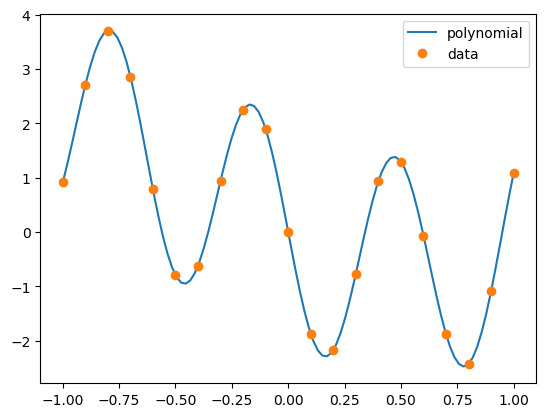

PyObject <matplotlib.legend.Legend object at 0x00000000026B41D0>

In [56]:
using PyPlot
grid = linspace(-1, 1, 100)
plot(grid, p.(grid), label="polynomial")
plot(xdata, ydata, "o", label="data")
legend()

### FFTW.jl

In [6]:
using FFTW

In [7]:
x = [4,3,2,1,0,1,2,3]
y = rfft(x)

5-element Array{Complex{Float64},1}:
    16.0+0.0im
 6.82843+0.0im
     0.0+0.0im
 1.17157+0.0im
     0.0+0.0im

### Measurements.jl

A package that allows you to define numbers with uncertainties, perform calculations involving them, and easily get the uncertainty of the result according to linear error propagation theory.

In [22]:
using Measurements

In [23]:
x = 4 ± 0.1

4.0 ± 0.1

In [24]:
typeof(x)

Measurement{Float64}

In [25]:
y = measurement(5.1, 0.2)

5.1 ± 0.2

In [26]:
x + y

9.1 ± 0.223606797749979

In [27]:
x * y

20.4 ± 0.9487360012142473

In [28]:
1/x # Δ(1/x) = d(1/x)/dx * Δx

0.25 ± 0.00625

Some properties to be aware of:

In [31]:
(3 ± 0.1) === (3 ± 0.1)

false

In [30]:
(3 ± 0.1) / (3 ± 0.1)

1.0 ± 0.04714045207910317

### Unitful.jl

In [1]:
using Unitful

In [3]:
1u"kg"

1 kg

In [9]:
unit(1u"kg")

kg

In [11]:
ustrip(1u"kg") # strip the units

1

In [15]:
uconvert(u"g", 1u"kg")

1000//1

In [33]:
1u"A" * 2u"Ω" isa Unitful.Voltage

true

Great, but can we avoid this `u"kg"` notation and make it more natural? Sure!

In [6]:
using Unitful: ms, s, minute, hr, rad, °, mm, cm, m, km

In [7]:
t = 1.0s

1.0 s

In [8]:
t + 2s

3.0 s

In [9]:
2*t

2.0 s

In [10]:
t^2

1.0 s^2

In [11]:
t + t^2

Unitful.DimensionError: DimensionError: 1.0 s and 1.0 s^2 are not dimensionally compatible.

Note that in Julia using unitful quantities comes with only a minor overhead, in contrast to Python for example. For more information have a look at https://medium.com/@Jernfrost/defining-custom-units-in-julia-and-python-513c34a4c971.

Domain specific extensions available: [UnitfulAstro.jl](https://github.com/JuliaAstro/UnitfulAstro.jl), [UnitfulUS.jl](https://github.com/ajkeller34/UnitfulUS.jl), [UnitfulAngles.jl](https://github.com/yakir12/UnitfulAngles.jl)

### PeriodicTable.jl

In [49]:
using PeriodicTable

In [50]:
elements

Elements(…119 elements…):
H                                                  He 
Li Be                               B  C  N  O  F  Ne 
Na Mg                               Al Si P  S  Cl Ar 
K  Ca Sc Ti V  Cr Mn Fe Co Ni Cu Zn Ga Ge As Se Br Kr 
Rb Sr Y  Zr Nb Mo Tc Ru Rh Pd Ag Cd In Sn Sb Te I  Xe 
Cs Ba    Hf Ta W  Re Os Ir Pt Au Hg Tl Pb Bi Po At Rn 
Fr Ra    Rf Db Sg Bh Hs Mt Ds Rg Cn Nh Fl Mc Lv Ts Og 
Uue                                                   
      La Ce Pr Nd Pm Sm Eu Gd Tb Dy Ho Er Tm Yb Lu    
      Ac Th Pa U  Np Pu Am Cm Bk Cf Es Fm Md No Lr    


In [51]:
elements["Sodium"] # or elements[:Na] or elements[11]

category,alkali metal
atomic mass,22.989769282 u
density,0.968 g/cm³
molar heat,28.23 J/mol⋅K
melting point,370.944 K
boiling point,1156.09 K
phase,Solid
shells,"[2, 8, 1]"
electron configuration,1s² 2s² 2p⁶ 3s¹
appearance,silvery white metallic
summary,"Sodium /ˈsoʊdiəm/ is a chemical element with symbol Na (from Ancient Greek Νάτριο) and atomic number 11. It is a soft, silver-white, highly reactive metal. In the Periodic table it is in column 1 (alkali metals), and shares with the other six elements in that column that it has a single electron in its outer shell, which it readily donates, creating a positively charged atom - a cation."


### HDF5.jl

In [88]:
using HDF5

In [144]:
A = rand(2,3)

2×3 Array{Float64,2}:
 0.996711  0.0955898  0.3628  
 0.831186  0.333382   0.504056

In [16]:
h5write("test.h5", "A", A)

UndefVarError: UndefVarError: h5write not defined

In [146]:
Aloaded = h5read("test.h5", "A")

2×3 Array{Float64,2}:
 0.996711  0.0955898  0.3628  
 0.831186  0.333382   0.504056

If one wants to read/write multiple things at once one can do that like so:

In [147]:
# r = read existing file
# r+ = read and write existing file
# w = overwrite existing / create new file
h5open("test.h5", "r+") do f
    for k in 1:5
        f[string(k)] = rand(2,2)
        # or write(f, string(k), rand(2,2))
    end
end

In [148]:
f = h5open("test.h5", "r+")

HDF5 data file: test.h5

In [149]:
names(f)

6-element Array{String,1}:
 "1"
 "2"
 "3"
 "4"
 "5"
 "A"

In [150]:
f["A"]

HDF5 dataset: /A (file: test.h5xfer_mode: 0 )

In [151]:
read(f["A"])

2×3 Array{Float64,2}:
 0.996711  0.0955898  0.3628  
 0.831186  0.333382   0.504056

HDF5 is nice and fine. It is supported by practically every programming language. However, some things are annoyingly complicated. For example, one can't just overwrite a dataset. Instead one has to check whether this dataset already exists, delete it if so, and then create a new dataset.

In [124]:
h5open("test.h5", "r+") do f
    HDF5.has(f, "A") && o_delete(f, "A")
    f["A"] = rand(2, 2)
end

Also, one can only store basic types like Float64, Int64, etc. (in an easy way)

In [153]:
C = rand(ComplexF64, 2, 2)
h5write("test.h5", "C", C)

MethodError: MethodError: no method matching write(::HDF5File, ::String, ::Array{Complex{Float64},2})
Closest candidates are:
  write(::Union{HDF5File, HDF5Group}, ::String, ::Any, !Matched::String, !Matched::Any, !Matched::Any...) at C:\Users\carsten\.julia\packages\HDF5\b6QoH\src\HDF5.jl:1627
  write(!Matched::AbstractString, ::Any, ::Any...) at io.jl:283
  write(!Matched::IO, ::Any, ::Any...) at io.jl:500
  ...

In [152]:
close(f);
rm("test.h5");

### JLD2.jl

HDF5 based but can story arbitrary Julia objects.

In [17]:
using JLD2

In [18]:
A = rand(2,3)

2×3 Array{Float64,2}:
 0.91899   0.125984  0.676983
 0.709554  0.388086  0.584184

In [19]:
@save "test.jld2" A

In [20]:
B = rand(2,3)

2×3 Array{Float64,2}:
 0.644377  0.657205  0.0572491
 0.565712  0.390731  0.160103 

In [35]:
@save "test.jld2" B # overwrites(!) test.jld2 file

In [36]:
@load "test.jld2" B # will load dataset "B" automatically to variable B

1-element Array{Symbol,1}:
 :B

To get more control, one can open/close the file as for HDF5:

In [37]:
jldopen("test.jld2", "r+") do f
    @show f["B"] # no read necessary
    @show f["C"] = rand(ComplexF64, 2, 2); # can store arbitrary Julia objects
end;

f["B"] = [0.644377 0.657205 0.0572491; 0.565712 0.390731 0.160103]
f["C"] = rand(ComplexF64, 2, 2) = Complex{Float64}[0.463698+0.745836im 0.733641+0.433613im; 0.49924+0.313831im 0.527326+0.161852im]


In [38]:
@load "test.jld2" # loads everything from file to variables

2-element Array{Symbol,1}:
 :B
 :C

In [39]:
C

2×2 Array{Complex{Float64},2}:
 0.463698+0.745836im  0.733641+0.433613im
  0.49924+0.313831im  0.527326+0.161852im

In [40]:
# clean up
rm("test.jld2")

### PyCall.jl

In [21]:
using PyCall

In [22]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\carsten\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>

In [23]:
x = rand(2,2)

2×2 Array{Float64,2}:
 0.0977143  0.0600382
 0.958824   0.935757 

In [25]:
np.linalg.eig(x)

([0.0338849, 0.999587], [-0.685143 -0.0664236; 0.728408 -0.997792])

### Distributions.jl

In [34]:
using Distributions

In [43]:
d = Normal()

Normal{Float64}(μ=0.0, σ=1.0)

In [44]:
rand(d, 10)

10-element Array{Float64,1}:
 -1.0822923462622904 
  1.9523307297407675 
  0.6280283309354753 
 -0.6856142235895836 
 -0.172672096945073  
 -0.03951834487053189
 -0.5918418013410142 
  2.261491793574629  
 -1.023251616518853  
 -1.2536069238277145 

In [41]:
d = Binomial()

Binomial{Float64}(n=1, p=0.5)

In [42]:
rand(d, 10)

10-element Array{Int64,1}:
 1
 0
 1
 0
 1
 1
 1
 0
 1
 1

### StatsBase.jl

In [52]:
using StatsBase, Random

In [53]:
x = randn(100);

In [58]:
h = fit(Histogram, rand(100), nbins=10)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.0:0.1:1.0
weights: [8, 12, 9, 9, 10, 12, 9, 10, 10, 11]
closed: left
isdensity: false

In [59]:
countmap(rand(1:5, 100))

Dict{Int64,Int64} with 5 entries:
  4 => 23
  2 => 17
  3 => 17
  5 => 27
  1 => 16

### [Revise.jl](https://github.com/timholy/Revise.jl)

Among others Revise can track

* any package that you load with `import` or `using`
* any script you load with `includet`

### [ITensors.jl](https://github.com/ITensor/ITensors.jl) (pre-release)

In [31]:
using ITensors

┌ Info: Precompiling ITensors [9136182c-28ba-11e9-034c-db9fb085ebd5]
└ @ Base loading.jl:1186


In [32]:
i = Index(3,"i")
j = Index(5,"j")
k = Index(4,"k")
l = Index(7,"l")

A = ITensor(i,j,k)
B = ITensor(j,l)

A[i(1),j(1),k(1)] = 11.1
A[i(2),j(1),k(2)] = 21.2
A[i(3),j(1),k(1)] = 31.1
# ...

# contract over index j
C = A*B

@show hasinds(C,i,k,l) # == true

D = randomITensor(k,j,i)

# add two ITensors
R = A+D

hasinds(C, i, k, l) = true


ITensor ord=3 (3|id=39|i) (5|id=222|j) (4|id=558|k)
Dense{Float64}

### [OMEinsum.jl](https://github.com/under-Peter/OMEinsum.jl) (pre-release)

https://nextjournal.com/under-Peter/julia-summer-of-einsum

In [4]:
using OMEinsum

┌ Info: Recompiling stale cache file C:\Users\carsten\.julia\compiled\v1.1\OMEinsum\rkjKX.ji for OMEinsum [ebe7aa44-baf0-506c-a96f-8464559b3922]
└ @ Base loading.jl:1184


In [11]:
x, y = rand(3), rand(3);

In [17]:
ein"i->"(x)

0-dimensional Array{Float64,0}:
1.0395039986951555

In [18]:
ein"i,i->"(x,y)

0-dimensional Array{Float64,0}:
0.29970319315362937

In [21]:
ein"i,j->ij"(x,y)

3×3 Array{Float64,2}:
 0.221013  0.0437778  0.0264008
 0.229176  0.0453947  0.0273758
 0.278733  0.0552109  0.0332956

In [25]:
x*y'

3×3 Array{Float64,2}:
 0.221013  0.0437778  0.0264008
 0.229176  0.0453947  0.0273758
 0.278733  0.0552109  0.0332956

In [5]:
a, b = rand(2,2), rand(2,2);

In [10]:
ein"ij,jk->"(a,b)

0-dimensional Array{Float64,0}:
1.2366188927926662

In [7]:
ein"ij,jk->"(a,b)[] ≈ sum(a * b)

true

Note that there is also the more mature [Einsum.jl](https://github.com/ahwillia/Einsum.jl)